In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
arr = [[1,0,0],
      [np.nan,3,1],
      [1,3,1],
      [700,6,0]]


In [3]:
arr

[[1, 0, 0], [nan, 3, 1], [1, 3, 1], [700, 6, 0]]

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imp.fit(arr)

SimpleImputer()

In [5]:
imp.transform(arr)

array([[  1.,   0.,   0.],
       [234.,   3.,   1.],
       [  1.,   3.,   1.],
       [700.,   6.,   0.]])

In [6]:
imp = SimpleImputer(missing_values=np.nan, strategy = 'median')
arr_new = imp.fit_transform(arr)
arr_new

array([[  1.,   0.,   0.],
       [  1.,   3.,   1.],
       [  1.,   3.,   1.],
       [700.,   6.,   0.]])

In [7]:
imp = SimpleImputer(missing_values=700, strategy = 'median')
imp.fit_transform(arr_new)

array([[1., 0., 0.],
       [1., 3., 1.],
       [1., 3., 1.],
       [1., 6., 0.]])

In [8]:
df = pd.DataFrame([['1','0','0'],
                  ['-1','3','1'],
                  ['-1','1','3'],
                  ['-1','6','0']],dtype = 'category')
df

,0,1,2
0,1,0,0
1,-1,3,1
2,-1,1,3
3,-1,6,0


In [9]:
df.dtypes

,0
0,category
1,category
2,category


In [10]:
imp = SimpleImputer(missing_values='-1', strategy = 'most_frequent')
imp.fit_transform(df)

array([['1', '0', '0'],
       ['1', '3', '1'],
       ['1', '1', '3'],
       ['1', '6', '0']], dtype=object)

**Поиск выбросов во временных рядах**

In [11]:
df = pd.read_csv('/content/drive/MyDrive/tmp.txt', header= None,sep = ';')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,20046,1957,,,,,,,,,,,-24.4,-26.1
1,20046,1958,-21.1,-25.4,-27.4,-19.9,-9.5,-1.8,1.0,-0.5,-4.0,-11.6,-19.3,-27.0
2,20046,1959,-28.6,-26.3,-23.8,-16.6,-8.6,-0.9,1.1,0.8,-1.4,-5.2,-10.1,-17.9
3,20046,1960,-205,-32.9,-27.2,-19.9,-7.3,-0.6,1.4,-0.1,-2.2,-12.4,-21.9,-22.4
4,20046,1961,-27.3,-27.4,-19.4,-16.3,-11.8,-0.8,1.5,1.5,-3.3,-9.6,-19.9,-27.3


In [13]:
df.columns = ['station_id','year','jan','feb','mar','apr', 'may',
              'june','july', 'aug','sept','oct','nov','dec']

In [14]:
months = df.columns[2:]

In [15]:
df[months] = df[months].apply(pd.to_numeric,errors = 'coerce' )

In [17]:
df.isnull().sum()

,0
station_id,0
year,0
jan,3597
feb,3513
mar,3452
apr,3448
may,3511
june,3541
july,3637
aug,3646


In [18]:
station = df[df['station_id'] == 31443].set_index('year')
station.head()

,station_id,jan,feb,mar,apr,may,june,july,aug,sept,oct,nov,dec
year,,,,,,,,,,,,,
1909,31443,NaN,NaN,NaN,NaN,9.5,15.0,19.8,18.2,10.1,1.7,-15.4,-27.6
1910,31443,-30.5,-25.1,-12.5,0.9,9.9,16.2,20.1,19.1,10.3,2.4,-14.1,-32.3
1911,31443,-33.7,-21.2,-15.3,2.1,9.2,16.2,18.2,17.6,9.8,1.2,-12.1,-30.2
1912,31443,-27.5,-20.7,-13.5,1.3,9.5,17.4,19.3,17.5,9.5,-3.7,-18.1,-33.6
1913,31443,-32.7,-20.4,-10.4,1.0,9.1,14.0,19.7,17.3,10.9,0.2,-17.6,-27.7


In [19]:
station.drop(['station_id'], inplace=True,axis=1)

In [20]:
station.isnull().sum()

,0
jan,14
feb,14
mar,14
apr,14
may,13
june,13
july,14
aug,14
sept,12
oct,12


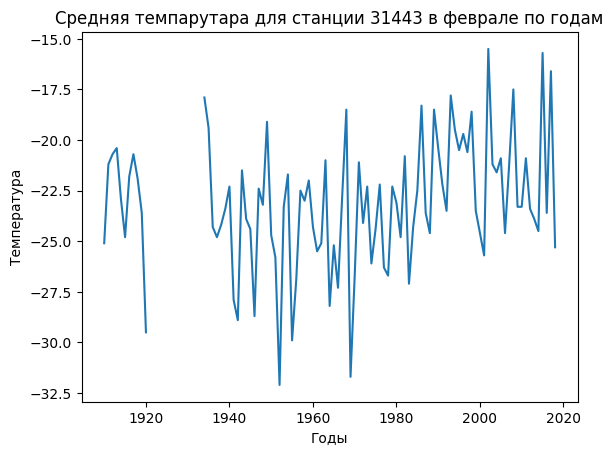

In [21]:
plt.plot(station['feb'])
plt.title('Средняя темпарутара для станции 31443 в феврале по годам')
plt.xlabel('Годы')
plt.ylabel('Температура');

In [22]:
d = station['feb'].interpolate(method='pad', limit_direction='forward')

<ipython-input-22-840c48f63e64>:1: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d = station['feb'].interpolate(method='pad', limit_direction='forward')


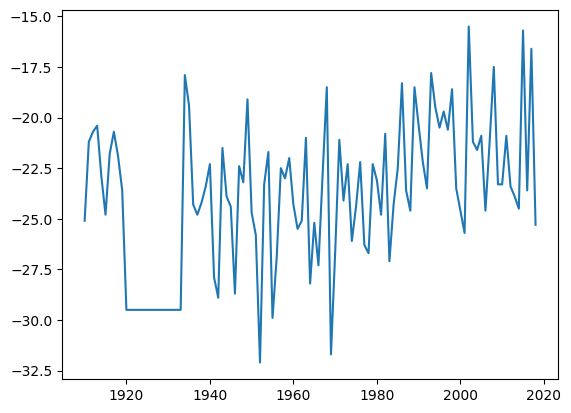

In [23]:
plt.plot(d);

In [24]:
d = station['feb'].interpolate(method='nearest', limit_direction='forward')

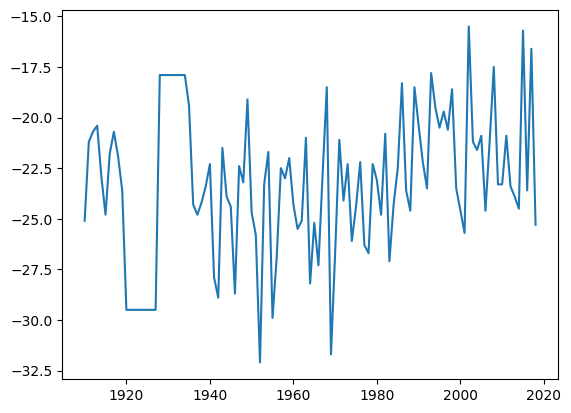

In [25]:
plt.plot(d);

In [26]:
d = station['feb'].interpolate(method='linear', limit_direction='forward')

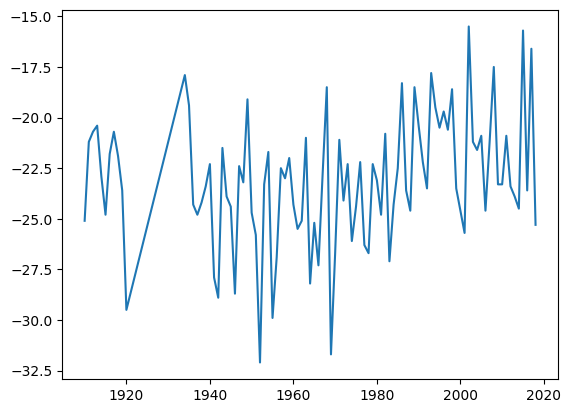

In [28]:
plt.plot(d);

In [29]:
d = station['feb'].interpolate(method='quadratic', limit_direction='forward')

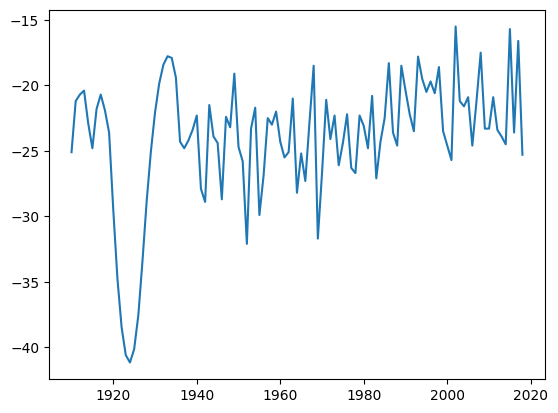

In [30]:
plt.plot(d);